In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

In [ ]:
df_Prod_Freq=pd.read_csv("Produtos_Frequencia.csv")
df_Prod_Freq.head()

In [ ]:
df_Prod_Freq.info()

In [ ]:
# Calcular o Porcentagem
Qtd_Total_Produtos=1.0*sum(df_Prod_Freq.Quantidade)
df_Prod_Freq["Porcentagem_Prod"]=np.round(100*df_Prod_Freq.Quantidade/Qtd_Total_Produtos,decimals=2)
#Porcentagem_Acumulada
Primeiro_Valor=df_Prod_Freq.Porcentagem_Prod[0]
df_Prod_Freq.set_value(0,"Porcentagem_Prod_Acumulada",Primeiro_Valor)
cont=0
for valor in  df_Prod_Freq.Porcentagem_Prod[1:]:
    Valor_Anterior=df_Prod_Freq.Porcentagem_Prod_Acumulada[cont]
#     print (Valor_Anterior)
    df_Prod_Freq.set_value(cont+1,"Porcentagem_Prod_Acumulada",valor+Valor_Anterior)
    
    cont +=1
print (df_Prod_Freq)


In [ ]:
df_Prod_Freq=df_Prod_Freq.iloc[:-1]
df_Prod_Freq

In [ ]:
def Formatar_Barra(ax_1,Coluna,Largura_Barra):
    '''
    ax_1: Grafica de Barras para Alterara
    df: Columna do eixo_X do Dataframe do Grafico
    Largura_Barra: Porcentagem da largura das Barras 
    '''
    columncounts=[]
    for Num_Bar in range(len(Coluna)): 
        columncounts.insert(Num_Bar,Largura_Bar)
    # Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
    def normaliseCounts(widths,maxwidth):
        widths = np.array(widths)/float(maxwidth)
        return widths

    widthbars = normaliseCounts(columncounts,100)

    # Loop over the bars, and adjust the width (and position, to keep the bar centred)
    for bar,newwidth in zip(ax_1.patches,widthbars):
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width/2.
        bar.set_x(centre-newwidth/2.)
        bar.set_width(newwidth)
#

In [ ]:
def Graf_Barras_Line_Acum(df,Nome_Column_Exo_X,Nome_Column_Exo_Y,Nome_Column_Exo_Y_Acum,Largura_Bar):
    '''
    df: Dataframe para Graficar as Barras
    Nome_Column_Exo_X: Nome da Coluna do Eixo X para ajustar
    Nome_Column_Exo_Y: Nome da Coluna do Eixo Y para ajustar
    Nome_Column_Exo_Y_Acum: Nome da Coluna do Eixo Y para a metrica da linha da frecuencia acumulada
    Largura_Bar:tamanho da Largura de cada Barra
    '''
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(21, 12))
    ax1 = fig.add_subplot(111)
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'rotation':90,
            'size': 16,
            }
    ax1 = sns.barplot(x=Nome_Column_Exo_X, y=Nome_Column_Exo_Y, data=df, color=(0.6, 0.1, 0.55, 0.02),hatch="--",edgecolor='white', zorder=1, lw=1.)
    ax1.set_xticklabels(labels=df[Nome_Column_Exo_X], fontdict=font)
    # ax1.set_yticklabels(labels=df_Prod_Freq.Quantidade, fontdict=font)
    ax1.tick_params(axis='y', labelsize=18)
    ax1.set_xlabel("",weight = 'bold')
    ax1.set_ylabel("",weight = 'bold')
    ax.set_xticklabels(labels=[], fontdict=font)
    ax.set_yticklabels(labels=[], fontdict=font)
    ax.axes.set_title("Districuicao dos Produtos",fontsize=50)
    ax1.set_xlabel(Nome_Column_Exo_X,fontsize=20,weight = 'bold')
    ax1.set_ylabel(Nome_Column_Exo_Y,fontsize=20,weight = 'bold')
    ax.tick_params(labelsize=16)

    #Graficando a Linea de Frequancia Acumulada

    ax2 = ax.twinx()
    ax2=sns.set_context(rc={"lines.linewidth": 4})

    ax2=sns.lineplot(x=df.rename_axis('Ind_X').reset_index()["Ind_X"] , y=Nome_Column_Exo_Y_Acum, data=df, color='blue')
    [ax2.text(p[0], p[1]-3, p[1], color='black',weight = 'bold',fontsize=16) for p in zip(ax1.get_xticks(), np.round(df[Nome_Column_Exo_Y_Acum].values,decimals=0))]
    ax2.tick_params(axis='y',labelsize=18)
    ax2.set_ylabel("Porcentagem Acumulada",fontsize=20,weight = 'bold')
    #
    #Formatando as barras para cada um
    Formatar_Barra(ax2,df[Nome_Column_Exo_X],Largura_Bar)


In [ ]:
Largura_Bar=70
Nom_Colum_Eixo_X="Productos"
Nom_Colum_Eixo_Y="Quantidade"
Nom_Colum_Eixo_Y_Acum="Porcentagem_Prod_Acumulada"
Graf_Barras_Line_Acum(df_Prod_Freq,Nom_Colum_Eixo_X,Nom_Colum_Eixo_Y,Nom_Colum_Eixo_Y_Acum,Largura_Bar)

In [ ]:
import ipywidgets as widgets

In [ ]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [ ]:
widgets.FloatSlider(
    value=0.00,
    min=-10.0,
    max=10.0,
    step=0.01,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

In [ ]:
widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)

In [ ]:

widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

In [ ]:
Red = widgets.IntSlider(description='Red')
Green = widgets.IntSlider(description='Green')
Blue = widgets.IntSlider(description='Blue')
A = widgets.IntSlider(description='A')
def f(Red, Green, Blue):
    Resultado=('{}*{}*{}={}'.format(Red, Green, Blue, Red*Green*Blue))
    return (Resultado)
# Valor=f(Red, Green, Blue)
# print (Valor)
out = widgets.interactive_output(f, {'Red': Red, 'Green': Green, 'Blue': Blue})

widgets.HBox([widgets.VBox([Red, Green, Blue]), out])

In [ ]:
a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

widgets.link((a, 'value'), (b, 'value'))
widgets.link((a, 'value'), (c, 'value'))
widgets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

In [ ]:

widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

In [4]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QColorDialog
from PyQt5.QtGui import QIcon
from PyQt5.QtCore import pyqtSlot
from PyQt5.QtGui import QColor
 
class App(QWidget):
 
    def __init__(self):
        super().__init__()
        self.title = 'PyQt5 color dialog - pythonspot.com'
        self.left = 10
        self.top = 10
        self.width = 320
        self.height = 200
        self.initUI()
 
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)
 
        button = QPushButton('Open color dialog', self)
        button.setToolTip('Opens color dialog')
        button.move(10,10)
        button.clicked.connect(self.on_click)
 
        self.show()
 
    @pyqtSlot()
    def on_click(self):
        openColorDialog(self)
 
    def openColorDialog(self):
        color = QColorDialog.getColor()
 
        if color.isValid():
            print(color.name())
 
    if __name__ == '__main__':
        app = QApplication(sys.argv)
        ex = App() 
        sys.exit(app.exec_())

NameError: name 'openColorDialog' is not defined

NameError: name 'openColorDialog' is not defined

NameError: name 'openColorDialog' is not defined

NameError: name 'openColorDialog' is not defined

NameError: name 'openColorDialog' is not defined

SystemExit: 0

C:\Users\emily\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from ipywidgets import Layout, Button, Box

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='50%')

words = ['correct', 'horse', 'battery', 'staple']
items = [Button(description=word, layout=items_layout, button_style='danger') for word in words]
box = Box(children=items, layout=box_layout)
box

In [ ]:
from ipywidgets import Layout, Button, Box, VBox

# Items flex proportionally to the weight and the left over space around the text
items_auto = [
    Button(description='weight=1; auto', layout=Layout(flex='1 1 auto', width='auto'), button_style='danger'),
    Button(description='weight=3; auto', layout=Layout(flex='3 1 auto', width='auto'), button_style='danger'),
    Button(description='weight=1; auto', layout=Layout(flex='1 1 auto', width='auto'), button_style='danger'),
 ]

# Items flex proportionally to the weight
items_0 = [
    Button(description='weight=1; 0%', layout=Layout(flex='1 1 0%', width='auto'), button_style='danger'),
    Button(description='weight=3; 0%', layout=Layout(flex='3 1 0%', width='auto'), button_style='danger'),
    Button(description='weight=1; 0%', layout=Layout(flex='1 1 0%', width='auto'), button_style='danger'),
 ]
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='70%')
box_auto = Box(children=items_auto, layout=box_layout)
box_0 = Box(children=items_0, layout=box_layout)
VBox([box_auto, box_0])

In [ ]:

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

In [ ]:
from ipywidgets import Layout, Button, Box

item_layout = Layout(height='100px', min_width='40px')
items = [Button(layout=item_layout, description=str(i), button_style='warning') for i in range(40)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_flow='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
VBox([Label('Scroll horizontally:'), carousel])

### Grafos

In [74]:
import pandas as pd
df_Matriz=pd.read_csv("Matriz.csv", sep=";")
df_Matriz

,w1,w2,w3,w4
w1,0.6,0.1,0.3,0.8
w2,0.1,0.8,0.1,0.7
w3,0.3,0.1,0.4,0.4
w4,0.8,0.7,0.4,0.0


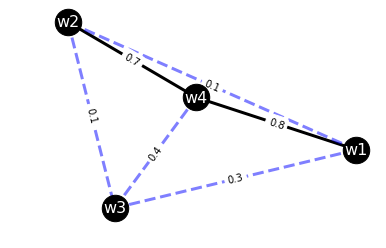

In [86]:
G = nx.Graph()
for name_Nodo_Linha in df_Matriz.index:
    for name_Nodo_Coluna in df_Matriz.columns:
        G.add_edge(name_Nodo_Linha, name_Nodo_Coluna, weight=df_Matriz[name_Nodo_Linha][name_Nodo_Coluna])

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700,node_color='black')
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall,width=3, alpha=0.5, edge_color='b', style='dashed')
# labels
nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif',font_color='w')
#Labels nos Enlaces
labels = nx.get_edge_attributes(G,'weight')
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.axis('off')
plt.show()

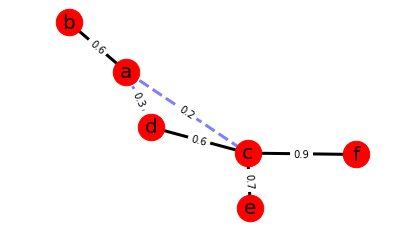

In [87]:
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.6)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=3, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

#Labels nos Nôs
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("Grafico_1.png")
plt.axis('off')
plt.show()

In [13]:
class Vertex:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}

    def __str__(self):
        return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent.keys()  

    def get_id(self):
        return self.id

    def get_weight(self, neighbor):
        return self.adjacent[neighbor]

class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0

    def __iter__(self):
        return iter(self.vert_dict.values())

    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None

    def add_edge(self, frm, to, cost = 0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)

        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

    def get_vertices(self):
        return self.vert_dict.keys()

if __name__ == '__main__':

    g = Graph()

    g.add_vertex('a')
    g.add_vertex('b')
    g.add_vertex('c')
    g.add_vertex('d')
    g.add_vertex('e')
    g.add_vertex('f')

    g.add_edge('a', 'b', 7)  
    g.add_edge('a', 'c', 9)
    g.add_edge('a', 'f', 14)
    g.add_edge('b', 'c', 10)
    g.add_edge('b', 'd', 15)
    g.add_edge('c', 'd', 11)
    g.add_edge('c', 'f', 2)
    g.add_edge('d', 'e', 6)
    g.add_edge('e', 'f', 9)

    for v in g:
        for w in v.get_connections():
            vid = v.get_id()
            wid = w.get_id()
            print ('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))

    for v in g:
        print ('g.vert_dict[%s]=%s' %(v.get_id(), g.vert_dict[v.get_id()]))

( a , b,   7)
( a , c,   9)
( a , f,  14)
( b , a,   7)
( b , c,  10)
( b , d,  15)
( c , a,   9)
( c , b,  10)
( c , d,  11)
( c , f,   2)
( d , b,  15)
( d , c,  11)
( d , e,   6)
( e , d,   6)
( e , f,   9)
( f , a,  14)
( f , c,   2)
( f , e,   9)
g.vert_dict[a]=a adjacent: ['b', 'c', 'f']
g.vert_dict[b]=b adjacent: ['a', 'c', 'd']
g.vert_dict[c]=c adjacent: ['a', 'b', 'd', 'f']
g.vert_dict[d]=d adjacent: ['b', 'c', 'e']
g.vert_dict[e]=e adjacent: ['d', 'f']
g.vert_dict[f]=f adjacent: ['a', 'c', 'e']


In [52]:
import pandas as pd
df_Matriz=pd.read_csv("Matriz.csv", sep=";")
df_Matriz

,w1,w2,w3
w1,0.6,0.1,0.3
w2,0.1,0.8,0.1
w3,0.3,0.3,0.4


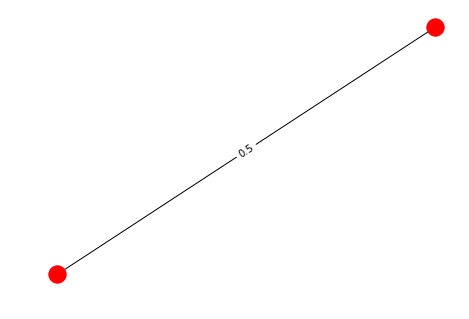

In [59]:
G=nx.Graph()
G.add_node("W1",pos=(1,1))
G.add_node("W2",pos=(2,2))
# 
G.add_edge("W1","W2",weight=0.5)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()
# for i in df_Matriz.columns:
#     G.add_node(i,pos=(i,i))

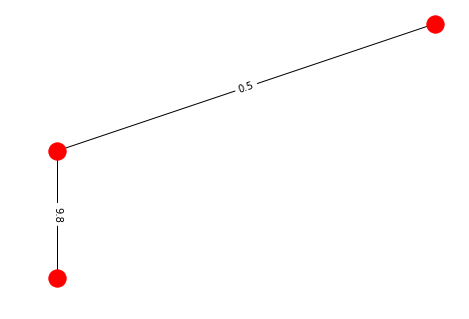

In [48]:
#!/usr/bin/python
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_node(1,pos=(1,1))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

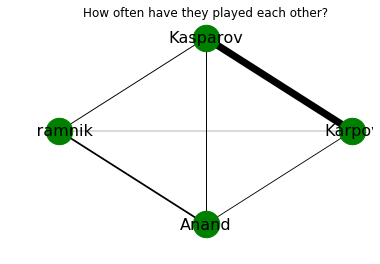

In [83]:
"""
An example of drawing a weighted graph using the NetworkX module
This is sample code and not indicative of how Qxf2 writes Python code
 
---------------
I. The problem:
---------------
I will be plotting how often these four world chess champions played each other:
a) Anatoly Karpov
b) Gary Kasparov
c) Vladimir Kramnik
d) Vishwanathan Anand
 
-------------------------
II. Technical references: 
-------------------------
1. https://networkx.github.io/documentation/networkx-1.9/examples/drawing/weighted_graph.html
2. https://stackoverflow.com/questions/28372127/add-edge-weights-to-plot-output-in-networkx
 
-----------------------------------------
III. Reference for data (as of Aug 2017):
-----------------------------------------
1. Karpov - Kasparov: 170 classical games
http://www.chessgames.com/perl/chess.pl?pid=15940&amp;pid2=20719
 
2. Karpov - Kramnik: 15 classical games
http://www.chessgames.com/perl/chess.pl?pid=20719&amp;pid2=12295
 
3. Karpov - Anand: 45 classical games
http://www.chessgames.com/perl/chess.pl?pid=20719&amp;pid2=12088
 
4. Kasparov - Kramnik: 49 classical games
http://www.chessgames.com/perl/chess.pl?pid=12295&amp;pid2=15940
 
5. Kasparov - Anand: 51 classical games
http://www.chessgames.com/perl/chess.pl?pid=12088&amp;pid2=15940
 
6. Kramnik - Anand: 91 classical games
http://www.chessgames.com/perl/chess.pl?pid=12295&amp;pid2=12088
"""
 
#1. Import pyplot and nx
import matplotlib.pyplot as plt
import networkx as nx
 
 
def plot_weighted_graph():
    "Plot a weighted graph"
 
    #2. Add nodes
    G = nx.Graph() #Create a graph object called G
    node_list = ['Karpov','Kasparov','Kramnik','Anand']
    for node in node_list:
        G.add_node(node)
 
    #Note: You can also try a spring_layout
    pos=nx.circular_layout(G) 
    nx.draw_networkx_nodes(G,pos,node_color='green',node_size=700)
 
    #3. If you want, add labels to the nodes
    labels = {}
    for node_name in node_list:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=16)
 
 
    #4. Add the edges (4C2 = 6 combinations)
    #NOTE: You usually read this data in from some source
    #To keep the example self contained, I typed this out
    G.add_edge(node_list[0],node_list[1],weight=370) #Karpov vs Kasparov
    G.add_edge(node_list[0],node_list[2],weight=15) #Karpov vs Kramnik
    G.add_edge(node_list[0],node_list[3],weight=45) #Karpov vs Anand
    G.add_edge(node_list[1],node_list[2],weight=49) #Kasparov vs Kramnik
    G.add_edge(node_list[1],node_list[3],weight=51) #Kasparov vs Anand
    G.add_edge(node_list[2],node_list[3],weight=91) #Kramnik vs Anand
 
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
 
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(node_list)*3.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
 
    #Plot the graph
    plt.axis('off')
    plt.title('How often have they played each other?')
    plt.savefig("chess_legends.png") 
    plt.show() 
 
#----START OF SCRIPT
if __name__=='__main__':
    plot_weighted_graph()

In [81]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']}) 
df
 
# Build your graph
G=nx.from_pandas_dataframe(df, 'from', 'to')
 
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'